In [29]:
from classification_train import *
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
params = {
    "train_subset" : 1000, # set to None if you want all,max 60k
    "test_subset" : 100, # max 6k
    "batch_size" : 32,
    "shuffle_batch" : True,
    "learning_rate" : 0.01,
    "momentum" : 0.9,
    'num_epochs' : 6, 
    'val_freq' : 2,
    "fname" : "classification_model"
}

In [8]:
trained_model, performance = run_classification_training(params)

1000 train images and 100 test images loaded
model initialized in classification mode
Epoch 1 / 6 complete, train loss: 2.266852, acc: 24.20%
Epoch 2 / 6 complete, train loss: 2.031042, acc: 52.60%
Val Loss: 1.824641, Accuracy: 69.00%
Epoch 3 / 6 complete, train loss: 1.803281, acc: 69.90%
Epoch 4 / 6 complete, train loss: 1.659871, acc: 86.30%
Val Loss: 1.586632, Accuracy: 93.00%
Epoch 5 / 6 complete, train loss: 1.559175, acc: 93.60%
Epoch 6 / 6 complete, train loss: 1.517544, acc: 96.80%
Val Loss: 1.533546, Accuracy: 95.00%
Finished Training!


In [9]:
performance.keys()

dict_keys(['train_loss', 'train_acc', 'val_loss', 'val_acc', 'pre_train_conf_mat', 'post_train_conf_mat'])

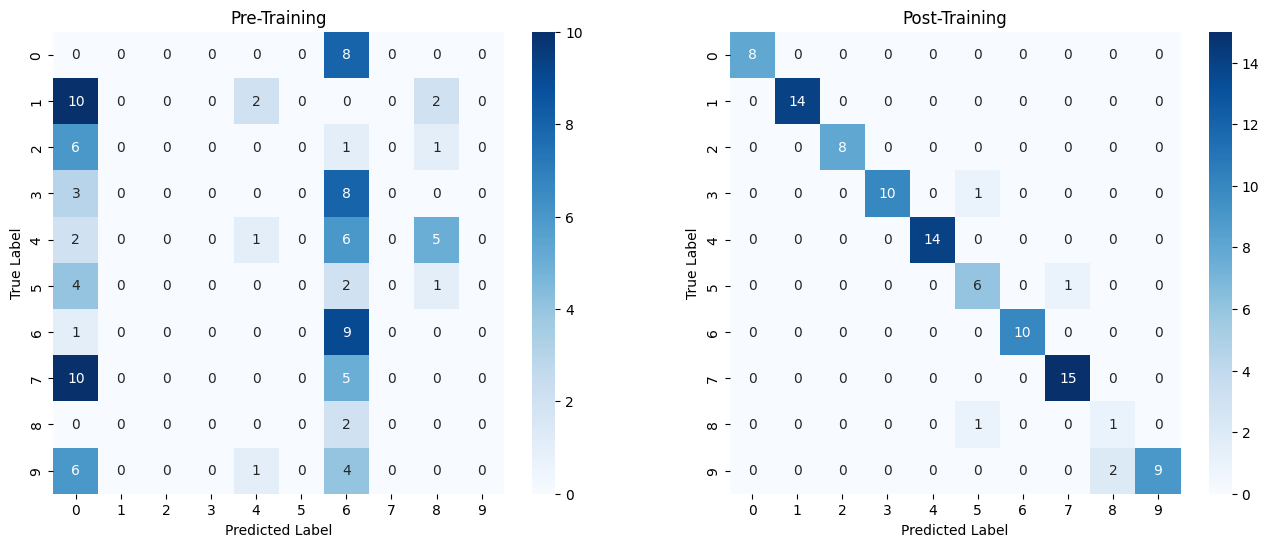

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

plot_confusion_matrix(performance["pre_train_conf_mat"], ax=ax[0], title="Pre-Training")
plot_confusion_matrix(performance["post_train_conf_mat"], ax=ax[1], title="Post-Training")



[Text(0, 0.5, 'Accuracy')]

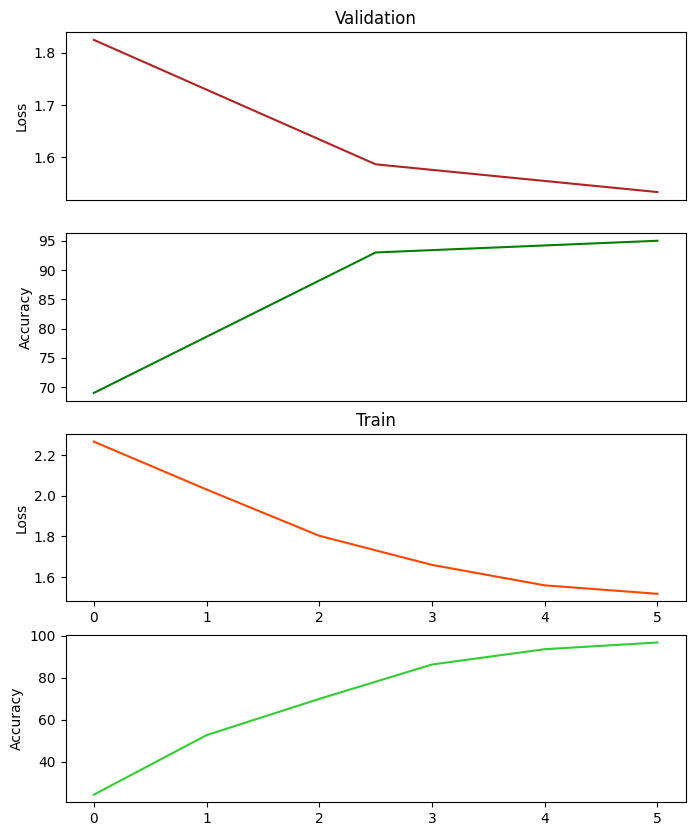

In [28]:
# ideally would have these on one plot but the lengths 
# are currently different. For train = n epochs. 
# and Val = n epochs/ validation frequency


fig, ax = plt.subplots(4,1, figsize=(8,10))


ax[0].plot(performance["val_loss"], color = "firebrick")
ax[0].set_xticks([])
ax[0].set(title="Validation", ylabel="Loss")

ax[1].plot(performance["val_acc"], color = "green")
ax[1].set_xticks([])
ax[1].set(ylabel="Accuracy")

ax[2].plot(performance["train_loss"], color = "orangered")
ax[2].set(title="Train", ylabel="Loss")


ax[3].plot(performance["train_acc"], color = "limegreen")
ax[3].set(ylabel="Accuracy")

